In [42]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [236]:
boston = load_boston()
data = boston['data']
target = boston['target']
feture_names = boston['feature_names']

/home/me_luck/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [237]:
# import pandas as pd
# import numpy as n
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

In [241]:
X = pd.DataFrame(data, columns=feture_names)
y = pd.DataFrame(target)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [243]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [275]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [245]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [246]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

/home/me_luck/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


До:	(404, 13)
После:	(404, 2)


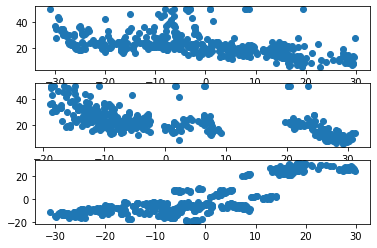

In [248]:
fig1,  (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.scatter(x=X_train_tsne[:, 0], y=y_train)
ax2.scatter(x=X_train_tsne[:, 1], y=y_train)
ax3.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1])

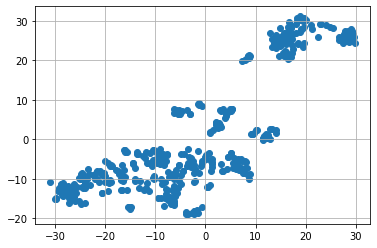

In [249]:
plt.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1])
plt.grid()

2.

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [250]:
model1 = KMeans(n_clusters=3, random_state=42, max_iter=100)
model2 = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [263]:
train_labels = model1.fit_predict(X_train_scaled) # для "поиграться"

# train_labels_tsne = model2.fit_predict(X_train_tsne)
# train_labels_tsne

In [264]:
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


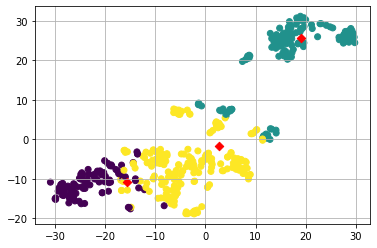

In [265]:
centers = model2.cluster_centers_

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:,1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.grid()

In [267]:
claster0 = X_train_tsne[train_labels == 0]
claster1 = X_train_tsne[train_labels == 1]
claster2 = X_train_tsne[train_labels == 2]
print(f'Среднее значение по 1-му кластеру: {np.mean(claster0[:, 0])}, {np.mean(claster0[:, 1])} \
        \nСреднее значение по 2-му кластеру: {np.mean(claster1[:, 0])}, {np.mean(claster1[:, 1])} \
        \nСреднее значение по 3-му кластеру: {np.mean(claster2[:, 0])}, {np.mean(claster2[:, 1])}')

Среднее значение по 1-му кластеру: -22.32526206970215, -11.113076210021973         
Среднее значение по 2-му кластеру: 16.68750762939453, 21.312721252441406         
Среднее значение по 3-му кластеру: -3.2793242931365967, -6.48056697845459


In [268]:
m0 = X_train['CRIM'][train_labels == 0].mean()
m1 = X_train['CRIM'][train_labels == 1].mean()
m2 = X_train['CRIM'][train_labels == 2].mean()
print(f'Среднее значение CRIM в 1-м кластере: {m0}')
print(f'Среднее значение CRIM во 2-м кластере: {m1}')
print(f'Среднее значение CRIM в 3-м кластере: {m2}')

Среднее значение CRIM в 1-м кластере: 0.07356558139534884
Среднее значение CRIM во 2-м кластере: 10.797028425196851
Среднее значение CRIM в 3-м кластере: 0.4216602094240837


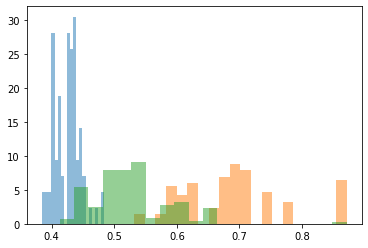

In [269]:
_ = plt.hist(X_train.loc[train_labels == 0, 'NOX'], bins=20, density=True, alpha=0.5)
_ = plt.hist(X_train.loc[train_labels == 1, 'NOX'], bins=20, density=True, alpha=0.5)
_ = plt.hist(X_train.loc[train_labels == 2, 'NOX'], bins=20, density=True, alpha=0.5)

Попробуем посмотреть распределение на кластуры относительно каждого признака, с целью найти тот, который дает наиболее качественное разбиение.

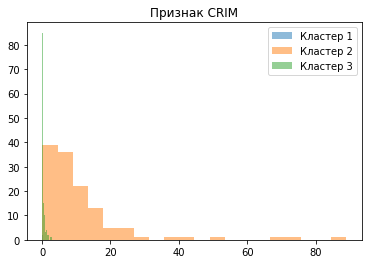

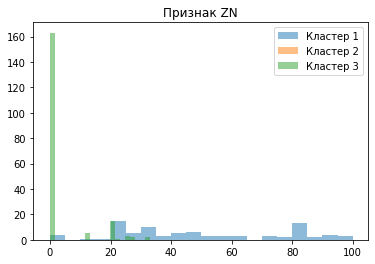

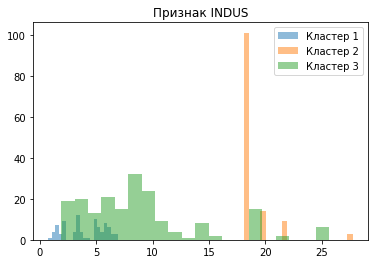

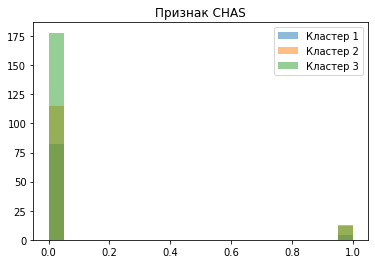

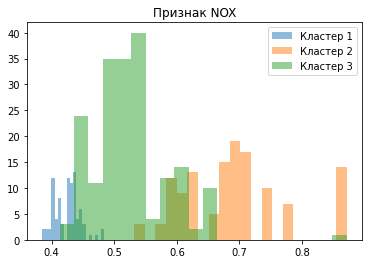

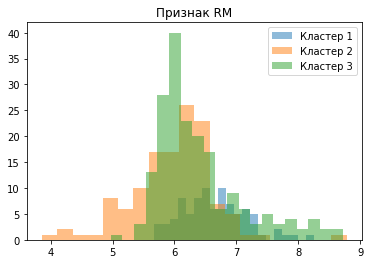

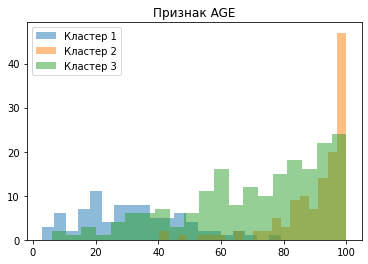

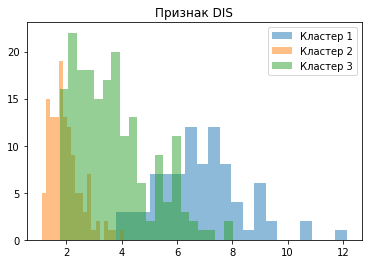

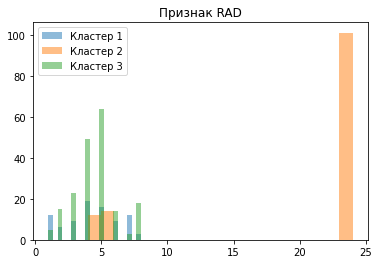

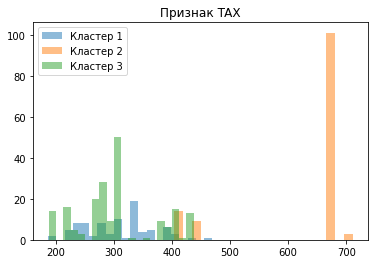

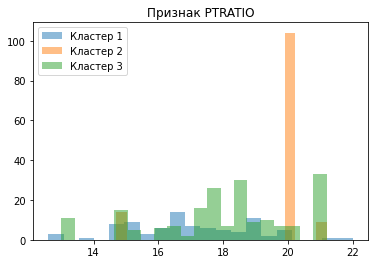

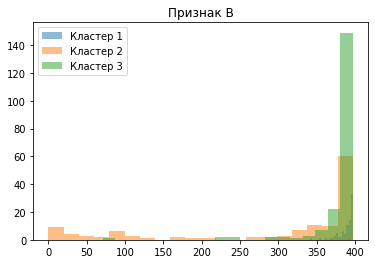

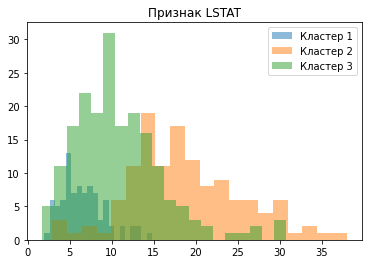

In [270]:
columns = X_train.columns.to_list()
for col in columns:
    plt.figure()
    plt.hist(X_train.loc[train_labels == 0, col], bins=20, alpha=0.5)
    plt.hist(X_train.loc[train_labels == 1, col], bins=20, alpha=0.5)
    plt.hist(X_train.loc[train_labels == 2, col], bins=20, alpha=0.5)
    plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
    plt.title(f'Признак {col}')

Признак NOX не идеален, но лучший из имеющихся
DIS, по-моему, примерно на том же уровне 

In [271]:
my0 = y_train[train_labels == 0].values.mean()
my1 = y_train[train_labels == 1].values.mean()
my2 = y_train[train_labels == 2].values.mean()
print(f'Среднее значение price в 1-м кластере: {my0}')
print(f'Среднее значение price во 2-м кластере: {my1}')
print(f'Среднее знчаение price в 3-м кластере: {my2}')

Среднее значение price в 1-м кластере: 27.78837209302326
Среднее значение price во 2-м кластере: 16.165354330708663
Среднее знчаение price в 3-м кластере: 24.958115183246072



*Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.



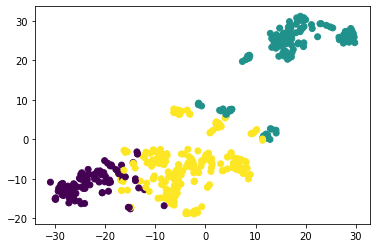

In [277]:
kmeans = KMeans(n_clusters=3)

labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [280]:
y_predicted_labels = kmeans.predict(X_test_scaled)

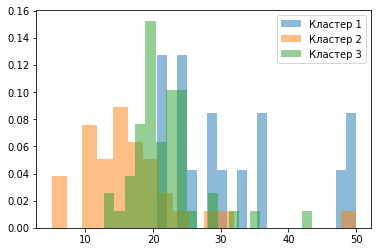

In [295]:
_ = plt.hist(y_test[y_predicted_labels == 0], bins=20, density=True, alpha=0.5)
_ = plt.hist(y_test[y_predicted_labels == 1], bins=20, density=True, alpha=0.5)
_ = plt.hist(y_test[y_predicted_labels == 2], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])

Кластер 2 сильно пересекается с Кластером 3

In [283]:
m10 = X_test['CRIM'][y_predicted_labels == 0].mean()
m11 = X_test['CRIM'][y_predicted_labels == 1].mean()
m12 = X_test['CRIM'][y_predicted_labels == 2].mean()
print(f'Среднее значение CRIM в 1-м кластере: {m10}')
print(f'Среднее значение CRIM во 2-м кластере: {m11}')
print(f'Среднее значение CRIM в 3-м кластере: {m12}')

Среднее значение CRIM в 1-м кластере: 0.06206
Среднее значение CRIM во 2-м кластере: 10.165531142857143
Среднее значение CRIM в 3-м кластере: 0.2660788235294118


In [294]:
m10 = X_test['NOX'][y_predicted_labels == 0].mean()
m11 = X_test['NOX'][y_predicted_labels == 1].mean()
m12 = X_test['NOX'][y_predicted_labels == 2].mean()
print(f'Среднее значение NOX в 1-м кластере: {m10}')
print(f'Среднее значение NOX во 2-м кластере: {m11}')
print(f'Среднее значение NOX в 3-м кластере: {m12}')

Среднее значение NOX в 1-м кластере: 0.42506875
Среднее значение NOX во 2-м кластере: 0.6667142857142857
Среднее значение NOX в 3-м кластере: 0.5043137254901962


In [284]:
m20 = y_test[y_predicted_labels == 0].values.mean()
m21 = y_test[y_predicted_labels == 1].values.mean()
m22 = y_test[y_predicted_labels == 2].values.mean()
print(f'Среднее значение цены в 1-м кластере: {m20}')
print(f'Среднее значение цены во 2-м кластере: {m21}')
print(f'Среднее значение цены в 3-м кластере: {m22}')

Среднее значение цены в 1-м кластере: 31.35
Среднее значение цены во 2-м кластере: 16.43714285714286
Среднее значение цены в 3-м кластере: 21.860784313725492


In [285]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

In [286]:
lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.668759493535632

In [290]:
lr.fit(X_train_scaled[train_labels == 0], y_train[train_labels == 0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[y_predicted_labels == 0])
r2_score(y_test[y_predicted_labels == 0], y_test_pred_0)

0.9155161972050827

In [291]:
lr.fit(X_train_scaled[train_labels == 1], y_train[train_labels == 1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[y_predicted_labels == 1])
r2_score(y_test[y_predicted_labels == 1], y_test_pred_1)

0.5238152845532971

In [292]:
lr.fit(X_train_scaled[train_labels == 2], y_train[train_labels == 2])

y_test_pred_2 = lr.predict(X_test_scaled.loc[y_predicted_labels == 2])
r2_score(y_test[y_predicted_labels == 2], y_test_pred_2)

0.7215240423132001